<a href="https://colab.research.google.com/github/hurutta/XFedAi/blob/main/XFedAi_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt
import time
import timeit

import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset  
from torch.utils.data import TensorDataset

In [ ]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('/content/drive/MyDrive/ML/ct_data_clean/COVID')

for file in tqdm(myFileList):
    #print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

/content/drive/MyDrive/ML/ct_data_clean/COVID


100%|██████████| 1002/1002 [00:10<00:00, 97.69it/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from google.colab import files
img = pd.read_csv('/content/img_pixels.csv')
img.shape

(1001, 10000)

In [ ]:
x = np.array(img.iloc[0])
df = pd.DataFrame({"pixels": [x],"cvd": 1})

In [ ]:
df

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1


In [ ]:
for i in range(1,len(img),1):
    x = np.array(img.iloc[i])
    dict = {'pixels': x,"cvd": 1}
    df = df.append(dict, ignore_index = True)
    #print(i,x)

In [ ]:
args = {
    "batch_size" : 64,
    "num_clients": 2,
    "frac": 1,
    "ep_local": 2,
    "bs_local": 10,
    "epochs": 4,
    #"dataset": "CIFAR10",
    "model": "CNN",
    "iid": "iid",
    
    # Unlearning params
    "unlearned_clients": [0], 
    "t": 2, # calibration_interval,
    "r": 0.5 # local_calibration_epoch_ratio r = Ecali/Eloc
    
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cpu


In [ ]:
df

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1
1,"[205, 205, 206, 204, 207, 207, 205, 204, 206, ...",1
2,"[68, 70, 64, 86, 191, 212, 194, 195, 195, 194,...",1
3,"[136, 202, 198, 190, 193, 194, 192, 192, 196, ...",1
4,"[209, 211, 200, 199, 200, 206, 205, 200, 197, ...",1
...,...,...
996,"[66, 70, 72, 70, 63, 80, 165, 216, 209, 206, 2...",1
997,"[206, 207, 208, 208, 206, 209, 204, 205, 205, ...",1
998,"[196, 194, 194, 195, 193, 193, 195, 199, 195, ...",1
999,"[73, 66, 117, 209, 212, 204, 206, 205, 208, 21...",1


In [ ]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('/content/drive/MyDrive/ML/ct_data_clean/non-COVID')

for file in tqdm(myFileList):
    #print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    with open("img_pixels2.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

/content/drive/MyDrive/ML/ct_data_clean/non-COVID


100%|██████████| 984/984 [00:10<00:00, 97.89it/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from google.colab import files
img2 = pd.read_csv('/content/img_pixels2.csv')
img2.shape

(983, 10000)

In [ ]:
df

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1
1,"[205, 205, 206, 204, 207, 207, 205, 204, 206, ...",1
2,"[68, 70, 64, 86, 191, 212, 194, 195, 195, 194,...",1
3,"[136, 202, 198, 190, 193, 194, 192, 192, 196, ...",1
4,"[209, 211, 200, 199, 200, 206, 205, 200, 197, ...",1
...,...,...
996,"[66, 70, 72, 70, 63, 80, 165, 216, 209, 206, 2...",1
997,"[206, 207, 208, 208, 206, 209, 204, 205, 205, ...",1
998,"[196, 194, 194, 195, 193, 193, 195, 199, 195, ...",1
999,"[73, 66, 117, 209, 212, 204, 206, 205, 208, 21...",1


In [ ]:
for i in range(0,len(img2),1):
    x = np.array(img2.iloc[i])
    dict = {'pixels': x,"cvd": 0}
    df = df.append(dict, ignore_index = True)
    #print(i,x)

In [ ]:
df.shape

(1984, 2)

In [ ]:
df.head()

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1
1,"[205, 205, 206, 204, 207, 207, 205, 204, 206, ...",1
2,"[68, 70, 64, 86, 191, 212, 194, 195, 195, 194,...",1
3,"[136, 202, 198, 190, 193, 194, 192, 192, 196, ...",1
4,"[209, 211, 200, 199, 200, 206, 205, 200, 197, ...",1


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df1=df.iloc[0:1104]
df2=df.iloc[1104:1764]
df3=df.iloc[1764:1984]

In [ ]:
df3.shape

(220, 2)

In [ ]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 100, 100))
    image_label = np.array(list(map(int, data['cvd'])))

    for i, row in enumerate(data.index):
        image = data.loc[row, 'pixels']
        image = np.reshape(image, (100, 100))
        image_array[i] = image
        
    return image_array, image_label

In [ ]:
df1['cvd'].value_counts()

1    567
0    537
Name: cvd, dtype: int64

In [ ]:
status = {0: 'no_covid', 1: 'covid'}
print(df.shape)
train_image_array, train_image_label = prepare_data(df1)
val_image_array, val_image_label = prepare_data(df2)
test_image_array, test_image_label = prepare_data(df3)

(1984, 2)


In [ ]:
test_image_array.shape

(220, 100, 100)

In [ ]:
#reshape and scale
train_images = train_image_array.reshape((train_image_array.shape[0], 1, 100, 100))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 1, 100, 100))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 1, 100, 100))
test_images = test_images.astype('float32')/255

In [ ]:
train_images[0]

array([[[0.80784315, 0.8235294 , 0.8117647 , ..., 0.9019608 ,
         0.92156863, 0.89411765],
        [0.81960785, 0.8156863 , 0.80784315, ..., 0.9019608 ,
         0.85490197, 0.8       ],
        [0.8117647 , 0.8       , 0.8039216 , ..., 0.88235295,
         0.79607844, 0.8117647 ],
        ...,
        [0.80784315, 0.8235294 , 0.8117647 , ..., 0.80784315,
         0.83137256, 0.9372549 ],
        [0.8       , 0.8039216 , 0.7921569 , ..., 0.90588236,
         0.9529412 , 0.7529412 ],
        [0.8156863 , 0.81960785, 0.8117647 , ..., 0.8039216 ,
         0.4862745 , 0.42352942]]], dtype=float32)

In [ ]:
print(type(train_images))
train_image_label.shape

<class 'numpy.ndarray'>


(1104,)

In [ ]:
train_labels = train_image_label
val_labels = val_image_label
test_labels = test_image_label

In [ ]:
test_labels

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
#Convert to tensor
train_images = torch.from_numpy(train_images)
train_labels = torch.from_numpy(train_labels)
val_images = torch.from_numpy(val_images)
val_labels = torch.from_numpy(val_labels)
test_images = torch.from_numpy(test_images)
test_labels = torch.from_numpy(test_labels)

In [ ]:
#type(train_images)
#train_labels[1]
train_labels

tensor([1, 0, 0,  ..., 0, 0, 0])

In [ ]:
# to dataset
dataset_train = TensorDataset(train_images, train_labels)
dataset_val = TensorDataset(val_images, val_labels)
dataset_test = TensorDataset(test_images, test_labels)

In [ ]:
type(dataset_train)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=args["batch_size"], shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=args["batch_size"], shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset_val, batch_size=args["batch_size"], shuffle=True)

In [ ]:
print(train_loader)

In [ ]:
c=0
i=1
for x, y in train_loader:
    print(i,x.shape, y.shape)
    c+=64
    i+=1
print(c)

1 torch.Size([64, 1, 100, 100]) torch.Size([64])
2 torch.Size([64, 1, 100, 100]) torch.Size([64])
3 torch.Size([64, 1, 100, 100]) torch.Size([64])
4 torch.Size([64, 1, 100, 100]) torch.Size([64])
5 torch.Size([64, 1, 100, 100]) torch.Size([64])
6 torch.Size([64, 1, 100, 100]) torch.Size([64])
7 torch.Size([64, 1, 100, 100]) torch.Size([64])
8 torch.Size([64, 1, 100, 100]) torch.Size([64])
9 torch.Size([64, 1, 100, 100]) torch.Size([64])
10 torch.Size([64, 1, 100, 100]) torch.Size([64])
11 torch.Size([64, 1, 100, 100]) torch.Size([64])
12 torch.Size([64, 1, 100, 100]) torch.Size([64])
13 torch.Size([64, 1, 100, 100]) torch.Size([64])
14 torch.Size([64, 1, 100, 100]) torch.Size([64])
15 torch.Size([64, 1, 100, 100]) torch.Size([64])
16 torch.Size([64, 1, 100, 100]) torch.Size([64])
17 torch.Size([64, 1, 100, 100]) torch.Size([64])
18 torch.Size([16, 1, 100, 100]) torch.Size([16])
1152


In [ ]:
# Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64*23*23, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
for images, y in val_loader:
    #print(x.shape, y.shape)
    break
conv1 = nn.Conv2d(1, 32, 3)             
conv2 = nn.Conv2d(32, 64, 3)
pool = nn.MaxPool2d(2, 2)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([64, 1, 100, 100])
torch.Size([64, 32, 98, 98])
torch.Size([64, 32, 49, 49])
torch.Size([64, 64, 47, 47])
torch.Size([64, 64, 23, 23])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
print(images.shape)                 #10x33856 and 6400x64)
#torch.Size([64, 1, 100, 100]) batch size, color channel, size

torch.Size([64, 1, 100, 100])


In [ ]:
class DatasetSplit(Dataset):
    def __init__(self, dataset_train, idxs):
        self.dataset_train = dataset_train
        self.idxs = list(idxs)

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, item):
        image, label = self.dataset_train[self.idxs[item]]
        return image, label

In [ ]:
# Distribute data - IID
num_items = int(len(dataset_train)/args["num_clients"])
dict_users, all_idxs = {}, [i for i in range(len(dataset_train))]
for i in range(args["num_clients"]):
    dict_users[i] = set(np.random.choice(all_idxs, num_items, replace=False))
    all_idxs = list(set(all_idxs) - dict_users[i])

local_datasets = []
for i in range(args["num_clients"]):
    local_datasets.append(DataLoader(DatasetSplit(dataset_train, dict_users[i]),
                                 batch_size=args["bs_local"], shuffle=True))

In [ ]:
len(local_datasets[0])

56

In [ ]:
class Client:
    num_clients = 0
    def __init__(self, data):
        self.id = Client.num_clients
        self.dataloader = data
        self.__model = None
        self.model_record = []
        self.device = device
        self.unlearned = False
        Client.num_clients += 1
        
        
    def setup(self, args):
        self.local_epoch = args["ep_local"]
        
        
    @property
    def unlearned(self):
        return self.__unlearned
    
    
    @unlearned.setter
    def unlearned(self, unlearned):
        self.__unlearned = unlearned
        
        
    @property
    def model(self):
        return self.__model
    
    
    @model.setter
    def model(self, model):
        self.__model = model
        
        
    def client_update(self):
        self.model.train()
        self.model.to(self.device)

        optimizer = optim.SGD(self.model.parameters(), lr=0.01)
        epoch_loss = []
        
        for epoch in range(self.local_epoch):
            batch_loss = []
            
            for batch_idx, (data, labels) in enumerate(self.dataloader):
                data, labels = data.to(self.device), labels.long().to(self.device)
                 
                self.model.zero_grad()
                outputs = self.model(data)
                loss = F.nll_loss(outputs, labels)

                loss.backward()
                optimizer.step() 

                batch_loss.append(loss.item())
            
            #print(f"Train Epoch: {epoch} \tLoss: {loss.item():.6f}")
            epoch_loss.append(sum(batch_loss)/len(batch_loss))

        #return self.model.state_dict(), sum(epoch_loss) / len(epoch_loss)
        return self.model, sum(epoch_loss) / len(epoch_loss)
    
    
    def client_test(self):
        self.model.eval()
        self.model.to(self.device)
        test_loss, correct = 0, 0
        with torch.no_grad():
            for data, labels in self.dataloader:
                data, labels = data.to(self.device), labels.to(self.device)
                outputs = self.model(data)
                test_loss += F.nll_loss(outputs, labels, reduction='sum').item()
                predicted = outputs.argmax(dim=1, keepdim=True)
                correct += predicted.eq(labels.data.view_as(predicted)).long().cpu().sum()


        test_loss /= len(self.dataloader.dataset)
        test_accuracy = correct / len(self.dataloader.dataset)

        print(f"Average loss: {test_loss:.4f}, Accuracy: {100. * test_accuracy:.2f}%")

        return test_accuracy, test_loss

In [ ]:
class Server:
    def __init__(self):
        self.round = 0
        self.model = Net().to(device)
        self.w_glob = None
        self.device = device
        
        self.history = {
            "train_loss": [], 
            "test_loss": [], 
            "train_acc": [],
            "test_acc": []
        }
        
        
    def setup(self, args):
        self.train_loader = train_loader
        self.test_loader = test_loader
        
        self.num_clients = args["num_clients"]
        self.num_rounds = args["epochs"]
        self.local_epochs = args["ep_local"]
        self.batch_size = args["batch_size"]
        self.clients = args["clients"]
        self.unlearned_clients = args["unlearned_clients"]
        
        self.local_model_record = [[] for i in range(self.num_clients)]
        self.global_model_record = []
        
        
    def fedAvg(self, w):
        w_avg = copy.deepcopy(w[0])
        for k in w_avg.keys():
            for i in range(1, len(w)):
                w_avg[k] += w[i][k]
            w_avg[k] = torch.div(w_avg[k], len(w))
        self.model
        return w_avg
    
    
    def send_global_model(self):
        for client in self.clients:
            #client.w_local = copy.deepcopy(self.w_glob)
            client.model = copy.deepcopy(self.model)
            client.model_record.append(client.model)
        
        
    def train_global_model(self):
        w_locals = [self.w_glob for i in range(self.num_clients)]
        loss_locals = [0 for i in range(self.num_clients)]
        
        # Send global model to clients
        self.send_global_model()
        print("Send global model to all clients...")
        
        # Train local model
        acc_test_clients, loss_test_clients = [], []
        for id, client in enumerate(self.clients):
            print(f"\nUpdating client {id}...")
            local_model, loss_train_client = client.client_update()
            
            # Save local models
            self.local_model_record[id].append(local_model)
            w_locals.append(local_model.state_dict())
            #print(w_locals)
            loss_locals.append(loss_train_client)
            
            print(f"Evaluating client {id}...")
            acc_test_client, loss_test_client = client.client_test()
            acc_test_clients.append(acc_test_client)
            loss_test_clients.append(loss_test_client)
            
            
        # Fed Aggregation
        w_glob = self.fedAvg(w_locals)
            
        # Update global model
        self.model.load_state_dict(w_glob)
            
        return acc_test_clients, loss_locals
    
    
    def federated_learning(self):
        self.model.train()
        self.w_glob = self.model.state_dict()
        
        print("\tFederated Learning:")
        for round in tqdm(range(self.num_rounds)):
            self.round = round + 1
            print(f"\nRound {self.round}/{self.num_rounds}: Starting...")
            acc_train_clients, loss_train_clients = self.train_global_model()
            self.history["train_acc"].append(100*sum(acc_train_clients)/len(acc_train_clients))
            self.history["train_loss"].append(sum(loss_train_clients)/len(loss_train_clients))
            
            print(f"\nRound {self.round}: Evaluating...")
            # Save test accuracy and loss
            acc_test_server, loss_test_server = self.test_global_model()
            self.history["test_acc"].append(acc_test_server)
            self.history["test_loss"].append(loss_test_server)
            
            print(f"|---- Average Clients Loss: {sum(loss_train_clients) / len(loss_train_clients)}")
            print(f"|---- Average Clients Accuracy: {100*sum(acc_train_clients)/len(acc_train_clients):.2f}%")
            print(f"|---- Server Testing Accuracy: {acc_test_server:.2f}%")
            
            print(f"\nRound {self.round}: Finished!\n")
            print(f"---------------------------------")
            
        self.show_result()
        self.plot(self.history)
        
        
    def show_result(self):
        # Testing data
        acc_test_server, loss_test_server = self.test_global_model()
        print(f' \n Results after {self.num_rounds} global rounds of training:')
        print(f"|---- Testing Accuracy: {acc_test_server:.2f}%")

        # Unlearned client
        print(f"\nUnlearned Clients:")
        for i in self.unlearned_clients:
            acc_test, loss_test = self.clients[i].client_test()
            print(f"|---- Unlearned Client - {i} Accuracy: {100*acc_test:.2f}%")
            
            
    def plot(self, history):
        fig, axs = plt.subplots(2, 1)
        axs[0].plot(history["train_loss"], color="b", label="Training Loss")
        axs[0].plot(history["test_loss"], color='r', label="Testing Loss")
        legend = axs[0].legend(loc="best", shadow=True)
        axs[0].set_xlabel("Communication Rounds")
        axs[0].set_ylabel("Loss")
        
        axs[1].plot(history["train_acc"], color="b", label="Training Accuracy")
        axs[1].plot(history["test_acc"], color='r', label="Testing Accuracy")
        legend = axs[1].legend(loc="best", shadow=True)
        axs[1].set_xlabel("Communication Rounds")
        axs[1].set_ylabel("Accuracy")
        
        
    def test_global_model(self):
        self.model.eval()
        
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, labels in self.test_loader:
                data, labels = data.to(self.device), labels.to(self.device)
                output = self.model(data)
                test_loss += F.nll_loss(output, labels, reduction='sum').item()  
                pred = output.argmax(dim=1, keepdim=True)  
                #correct += pred.eq(target.view_as(pred)).sum().item()
                correct += pred.eq(labels.data.view_as(pred)).long().cpu().sum()


        test_loss /= len(self.test_loader.dataset)
        accuracy = 100. * correct / len(self.test_loader.dataset)

        print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({ 100. * correct / len(test_loader.dataset):.2f}%)\n')

        return accuracy, test_loss
    

In [ ]:
# Create clients and distribute the dataset 
# All clients are stored in list clients
args["clients"] = []
for i in range(args["num_clients"]):
    client = Client(local_datasets[i])
    client.setup(args)
    args["clients"].append(client)
    
for unlearned in args["unlearned_clients"]:
    args["clients"][unlearned].unlearned = True

In [ ]:
# Create a server
server = Server()
server.setup(args)

	Federated Learning:


  0%|          | 0/4 [00:00<?, ?it/s]


Round 1/4: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.6883, Accuracy: 49.82%

Updating client 1...
Evaluating client 1...
Average loss: 0.6879, Accuracy: 67.21%

Round 1: Evaluating...


 25%|██▌       | 1/4 [00:35<01:45, 35.01s/it]


Test set: Average loss: 0.6835, Accuracy: 123/220 (55.91%)

|---- Average Clients Loss: 0.34339841162519796
|---- Average Clients Accuracy: 58.51%
|---- Server Testing Accuracy: 55.91%

Round 1: Finished!

---------------------------------

Round 2/4: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.6373, Accuracy: 57.07%

Updating client 1...
Evaluating client 1...
Average loss: 0.6753, Accuracy: 55.25%

Round 2: Evaluating...


 50%|█████     | 2/4 [01:10<01:10, 35.12s/it]


Test set: Average loss: 0.6625, Accuracy: 148/220 (67.27%)

|---- Average Clients Loss: 0.33562322266932043
|---- Average Clients Accuracy: 56.16%
|---- Server Testing Accuracy: 67.27%

Round 2: Finished!

---------------------------------

Round 3/4: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.7022, Accuracy: 52.90%

Updating client 1...
Evaluating client 1...
Average loss: 0.8977, Accuracy: 49.82%

Round 3: Evaluating...


 75%|███████▌  | 3/4 [01:46<00:35, 35.49s/it]


Test set: Average loss: 0.6657, Accuracy: 105/220 (47.73%)

|---- Average Clients Loss: 0.3224595538340509
|---- Average Clients Accuracy: 51.36%
|---- Server Testing Accuracy: 47.73%

Round 3: Finished!

---------------------------------

Round 4/4: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.5872, Accuracy: 68.30%

Updating client 1...
Evaluating client 1...
Average loss: 0.6845, Accuracy: 59.06%

Round 4: Evaluating...


100%|██████████| 4/4 [02:22<00:00, 35.54s/it]


Test set: Average loss: 0.5796, Accuracy: 168/220 (76.36%)

|---- Average Clients Loss: 0.30858317449955003
|---- Average Clients Accuracy: 63.68%
|---- Server Testing Accuracy: 76.36%

Round 4: Finished!

---------------------------------



Test set: Average loss: 0.5796, Accuracy: 168/220 (76.36%)

 
 Results after 4 global rounds of training:
|---- Testing Accuracy: 76.36%

Unlearned Clients:
Average loss: 0.5872, Accuracy: 68.30%
|---- Unlearned Client - 0 Accuracy: 68.30%


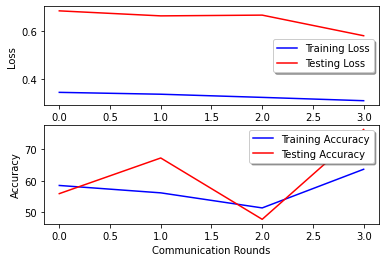

In [ ]:
server.federated_learning()

In [ ]:
df.shape

(1984, 2)

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 8.5 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491636 sha256=2af085d07c346153de6c8e3024e725f94baf2e6c90fbf9741c6478b34f7a34b1
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
test_image_array1 = np.reshape(test_image_array, (220, 10000))
test_image_array1 = test_image_array1.astype('float32')/255
test_image_label1 = test_image_label

X_test1 = torch.from_numpy(test_image_array1)
y_test1 = torch.from_numpy(test_image_label1)

In [ ]:
print(X_test1)

tensor([[0.8078, 0.8078, 0.8039,  ..., 0.8353, 0.8314, 0.8196],
        [0.8745, 0.8863, 0.8980,  ..., 0.8157, 0.8118, 0.8118],
        [0.8118, 0.7765, 0.8078,  ..., 0.9961, 0.9255, 0.9059],
        ...,
        [0.8000, 0.8039, 0.8039,  ..., 0.9020, 0.8902, 0.8941],
        [0.3098, 0.7765, 0.9294,  ..., 0.2549, 0.2706, 0.2706],
        [0.8157, 0.8078, 0.8078,  ..., 0.5647, 0.2667, 0.3176]])


In [ ]:
test1 = torch.utils.data.TensorDataset(X_test1, y_test1)

test1_loader = torch.utils.data.DataLoader(test1, batch_size=args["batch_size"], shuffle = False)

In [ ]:
test1_loader

In [ ]:
batch = next(iter(test1_loader))
images, _ = batch
images = images.view(-1, 1, 100, 100)

In [ ]:
images.shape
background = images[:32]
test_images= images[32:60]

In [ ]:
background.shape

torch.Size([32, 1, 100, 100])

In [ ]:
import shap

model = Net()
e = shap.DeepExplainer(model, images)
shap_values = e.shap_values(test_images)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [ ]:
e

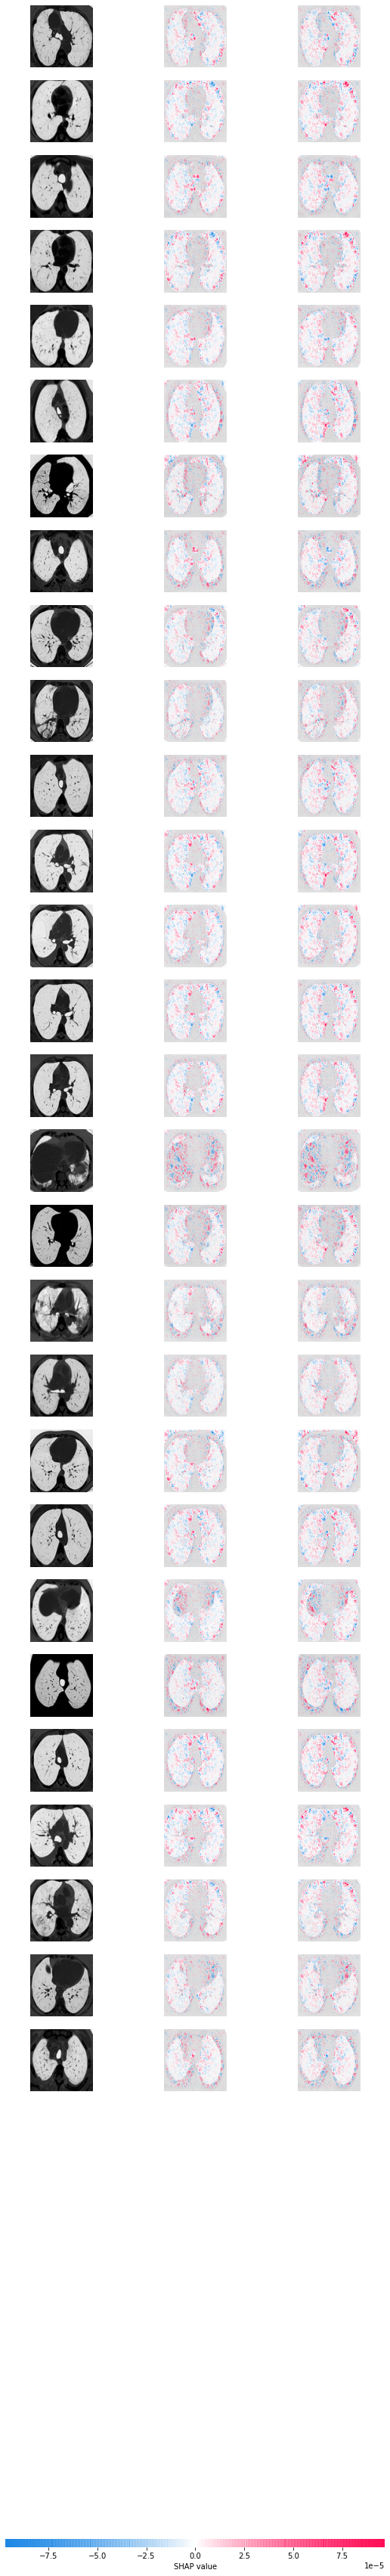

In [ ]:
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.numpy(), 1, -1), 1, 2)

shap.image_plot(shap_numpy, -test_numpy)